In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
df=pd.read_csv('Manhattan.csv')
df.head(2)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan


Forming the X(independent variables set) and the Y(Dependent Variable)

In [61]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
        'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 
        'has_patio', 'has_gym']]

y = df[['rent']]

##### Train Test Split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

#### Forming the model and fitting the data

In [63]:
mlr=LinearRegression()

# fitting the data

mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#Print Coefficents and then intercept
print('coefficients',mlr.coef_,'\n')
print('intercept :',int(mlr.intercept_))

coefficients [[-293.05663063 1212.86140548    4.76347019  -17.19931706   25.21833592
    -7.4808637  -122.54133708  110.8157959   126.9741238   -97.37250655
    62.07974807    6.88421012 -111.47104149 -119.87465729]] 

intercept : -409


#### Predicting values for test set

In [108]:
y_predicted=mlr.predict(x_test)

# Plotting the data
plt.scatter(y_test,y_predicted,color='black')
plt.plot(range(20000), range(20000),color='red')

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

 ### The <font color='red'> "R^2" </font> Score value 
 
 1-(u/v), where 
 
 u=((y - y_predict) ** 2).sum()
 
 v=((y - y.mean()) ** 2).sum()

In [98]:
print('Train R^2 Score:',mlr.score(x_train,y_train),'\n')
print('Test R^2 Score:',mlr.score(x_test,y_test))

Train R^2 Score: 0.7810670527340515 

Test R^2 Score: 0.7705308409415589


In [105]:
apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
apartment_rent=mlr.predict(apartment)
print("the rent for Apartment is : $",int(apartment_rent))

the rent for Apartment is : $ 2380


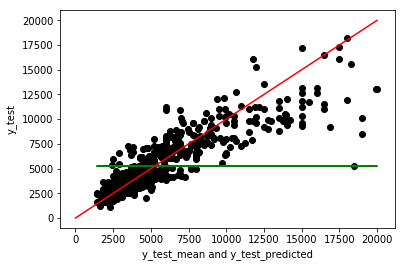

In [97]:
y_mean=np.array(y_test)
r,m=y_mean.shape
for z in range(r):
    y_mean[z]=y_test.mean()
plt.plot(y_test,y_mean,color='green')
plt.scatter(y_test,y_predicted,color='black')
plt.plot(range(20000), range(20000),color='red')
plt.xlabel('y_test_mean and y_test_predicted')
plt.ylabel('y_test')
plt.show()